#Set Up

In [ ]:
!pip install datasets

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 6s (10.9 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [1]:
from datasets import load_dataset, concatenate_datasets, ClassLabel
import matplotlib.pyplot as plt
import numpy as np
import json

/Users/squirrellover/Library/Python/3.10/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Getting to Know the Data

## RareBench

In [2]:
datasets = ["RAMEDIS", "MME", "HMS", "LIRICAL"]
combined_data = []

for dataset in datasets:
    data = load_dataset("chenxz/RareBench", dataset, split="test")
    combined_data.append(data)

combined_dataset = concatenate_datasets(combined_data)
print(combined_dataset)
print(combined_dataset[0])

Dataset({
    features: ['Phenotype', 'RareDisease', 'Department'],
    num_rows: 1122
})
{'Phenotype': ['HP:0001522', 'HP:0001942', 'HP:0003210', 'HP:0003819'], 'RareDisease': ['OMIM:251000', 'ORPHA:27', 'CCRD:71'], 'Department': None}


In [3]:
#mapping disease
with open("disease_mapping.json", "r") as f:
    disease_mapping = json.load(f)

def replace_codes_with_names(example):
    updated_diseases = []
    for code in example["RareDisease"]:
        if code in disease_mapping:
            updated_diseases.append(disease_mapping[code])
        else:
            updated_diseases.append(code)
            print(code)
    updated_diseases = list(set(updated_diseases))
    example["RareDisease"] = updated_diseases
    return example

combined_dataset = combined_dataset.map(replace_codes_with_names)

print(combined_dataset[0])

{'Phenotype': ['HP:0001522', 'HP:0001942', 'HP:0003210', 'HP:0003819'], 'RareDisease': ['甲基丙二酸血症; 甲基丙二酸尿症/Methylmalonic acidemia; MMA; Methylmalonic aciduria', 'Vitamin B12-unresponsive methylmalonic acidemia/Methylmalonic aciduria due to methylmalonyl-coa mutase deficiency'], 'Department': None}


In [4]:
#mapping phenotype
with open("phenotype_mapping.json", "r") as f:
    pheno_mapping = json.load(f)

def replace_codes_with_names(example):
    updated_pheno = []
    for code in example["Phenotype"]:
        if code in pheno_mapping:
            updated_pheno.append(pheno_mapping[code])
        else:
            updated_pheno.append(code)
            print(code)
    example["Phenotype"] = updated_pheno
    return example

combined_dataset = combined_dataset.map(replace_codes_with_names)

print(combined_dataset[1])

{'Phenotype': ['Motor delay', 'Generalized hypotonia', 'Death in infancy', 'Pneumonia', 'Elevated urinary carboxylic acid'], 'RareDisease': ['Succinic semialdehyde dehydrogenase deficiency/Succinic semialdehyde dehydrogenase deficiency'], 'Department': None}


In [ ]:
#show chinese characters
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-02-27 20:25:06--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.189.138, 64.233.189.101, 64.233.189.139, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-02-27 20:25:07--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  80.1MB/s    in 0.2s    

2025-02-27 20:25:

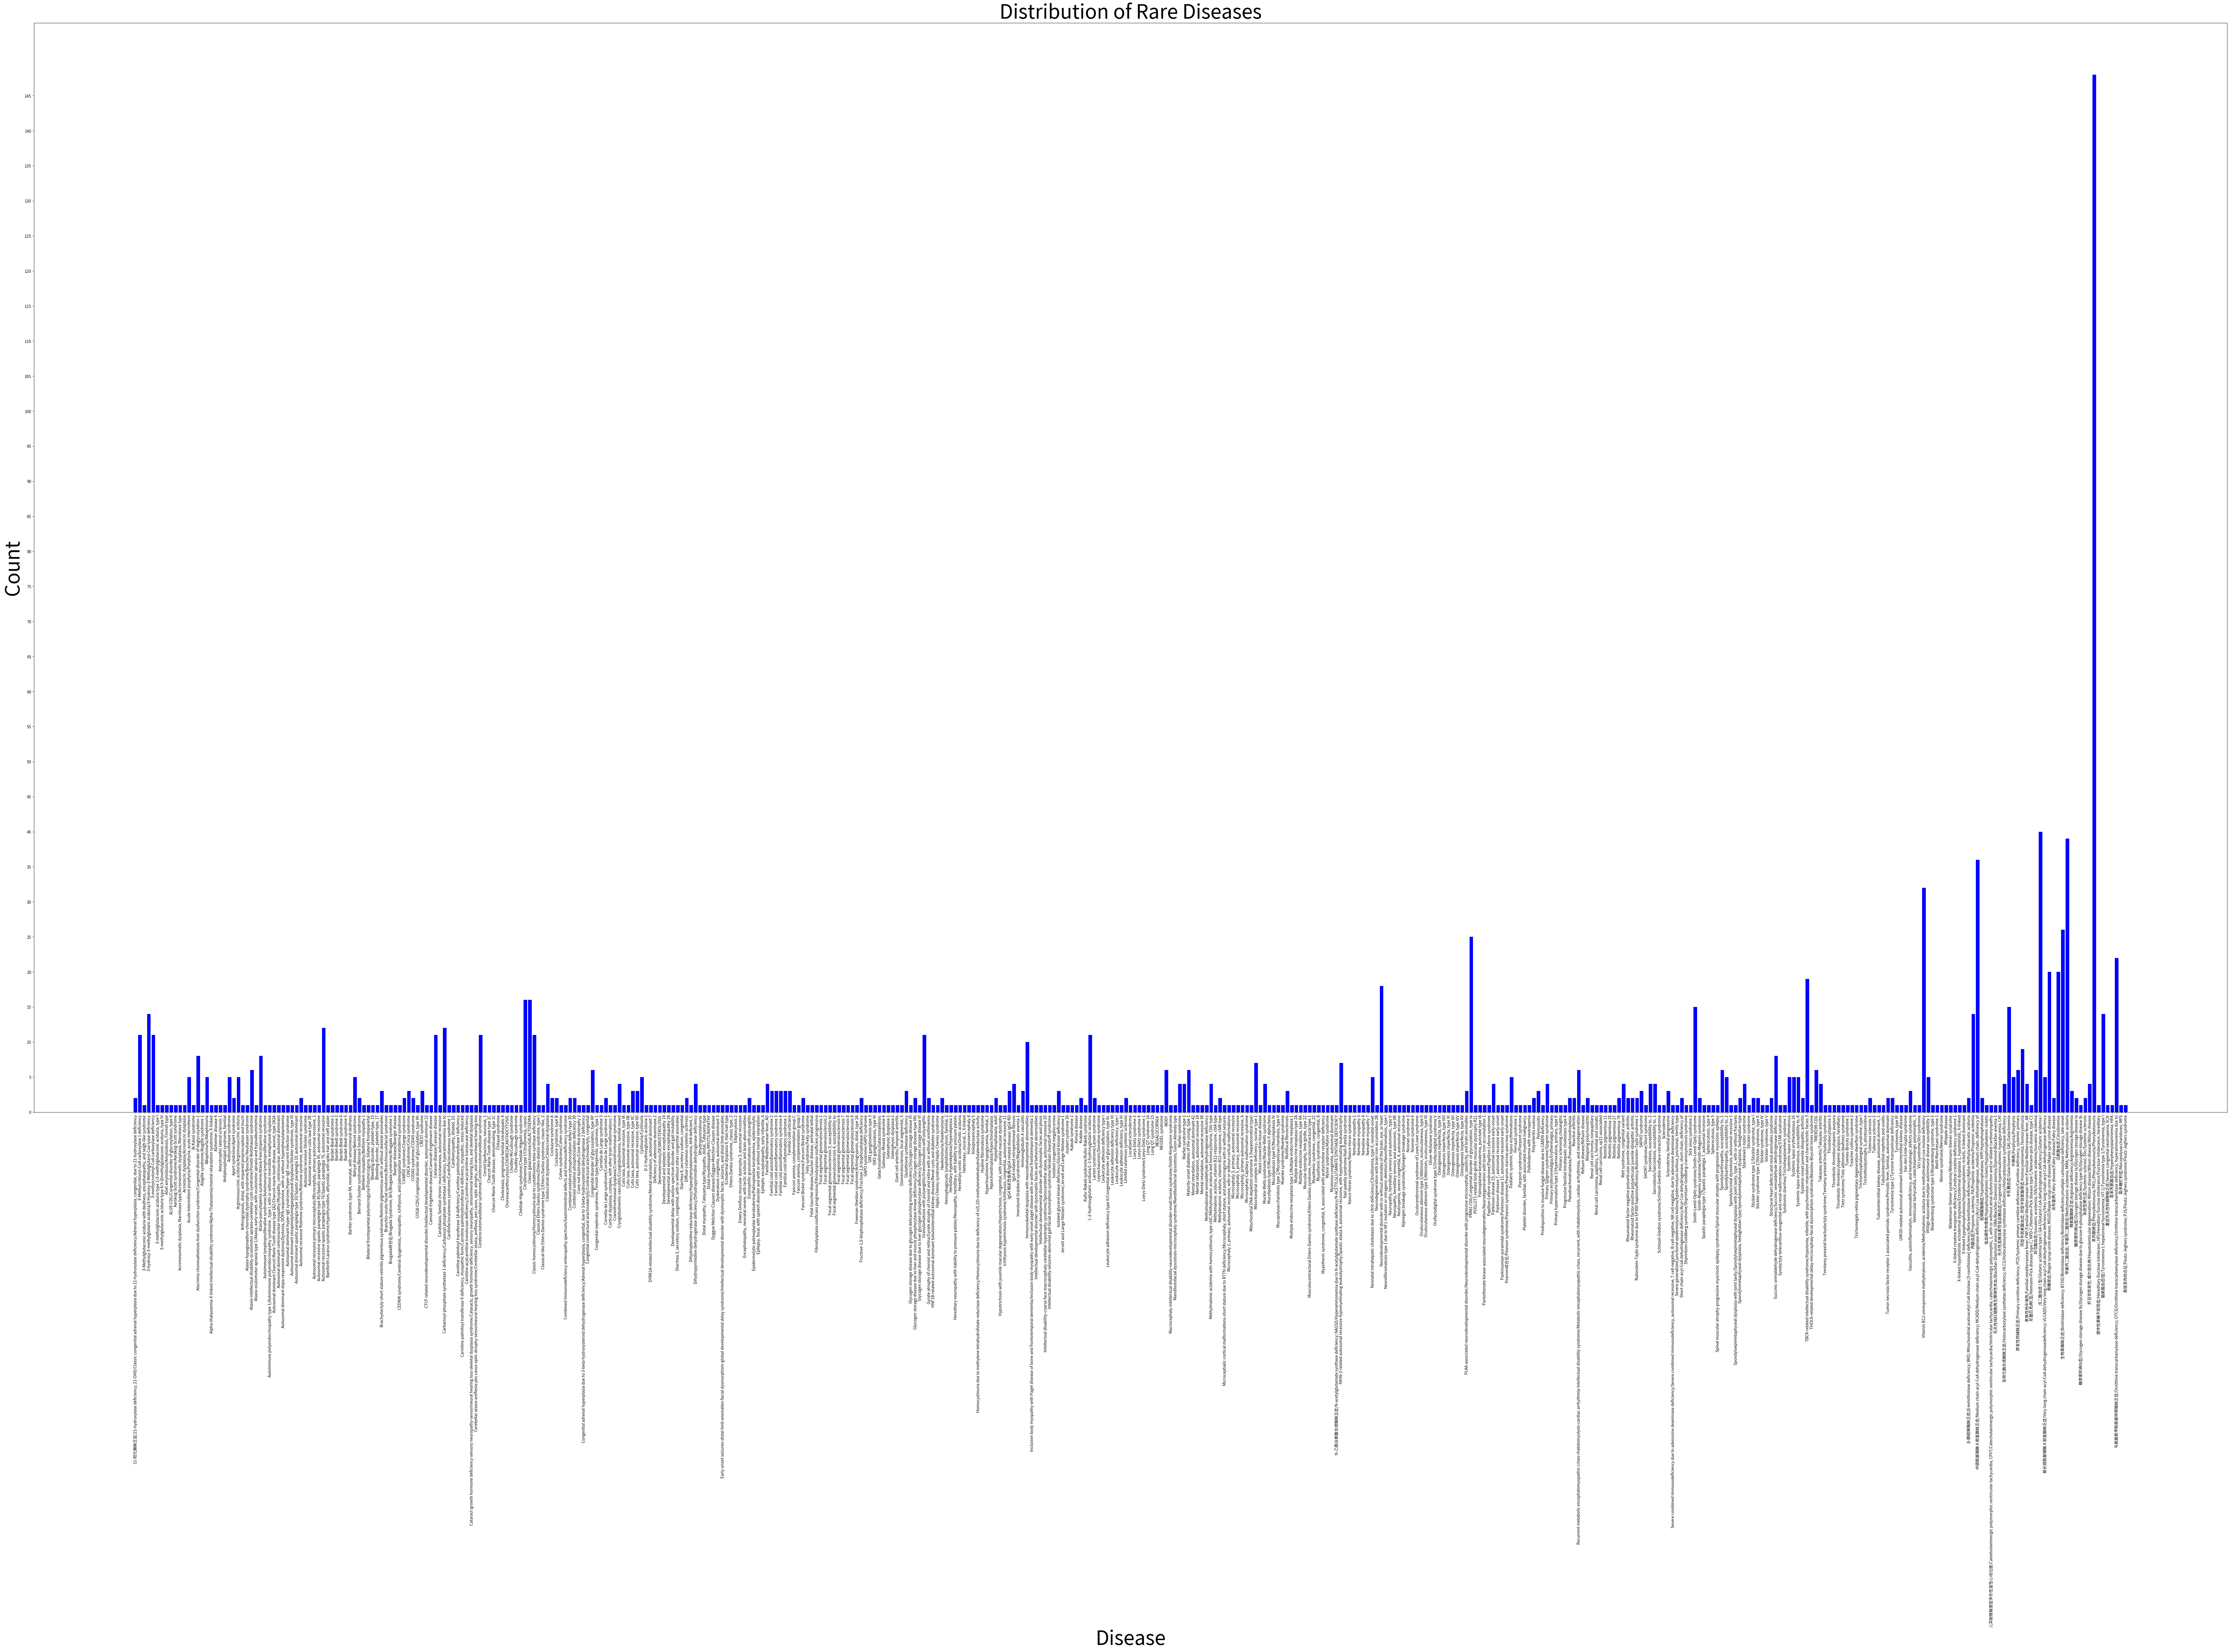

In [ ]:
#data distribution

rb_counts = {}

for example in combined_dataset:
    for i in example["RareDisease"]:
      if i in rb_counts:
        rb_counts[i] += 1
      else:
        rb_counts[i] = 1

rb_counts = {key: val for key, val in sorted(rb_counts.items(), key = lambda ele: ele[0])}

codes = list(rb_counts.keys())
frequencies = list(rb_counts.values())

plt.figure(figsize=(100, 50))
plt.bar(codes, frequencies, color="blue")

plt.xlabel("Disease", fontsize=50)
plt.ylabel("Count", fontsize=50)
plt.title("Distribution of Rare Diseases", fontsize=50)

plt.xticks(rotation=90, fontsize=10)
max_y = max(frequencies) + 1
plt.yticks(np.arange(0, max_y + 1, 5))

plt.show()

##ReDis-QA


In [2]:
redis_data = load_dataset("guan-wang/ReDis-QA")
redis_data = redis_data["test"]

print(redis_data)
print(redis_data[0])

Generating test split: 100%|██████████| 1360/1360 [00:00<00:00, 56671.90 examples/s]

Dataset({
    features: ['question', 'opa', 'opb', 'opc', 'opd', 'cop', 'rare disease', 'input'],
    num_rows: 1360
})
{'question': 'All are features of Abetalipoproteinemia, EXCEPT:', 'opa': 'Plasma levels of cholesterol and triglyceride are extremely low', 'opb': 'Manifest in early childhood with diarrhea', 'opc': 'Progressive pigmented retinopathy seen', 'opd': 'Neurological manifestation as ataxia in first decade', 'cop': 3, 'rare disease': ['Abetalipoproteinemia'], 'input': 'Question: All are features of Abetalipoproteinemia, EXCEPT:\nChoices:\nA. Plasma levels of cholesterol and triglyceride are extremely low\nB. Manifest in early childhood with diarrhea\nC. Progressive pigmented retinopathy seen\nD. Neurological manifestation as ataxia in first decade\nAnswer:'}


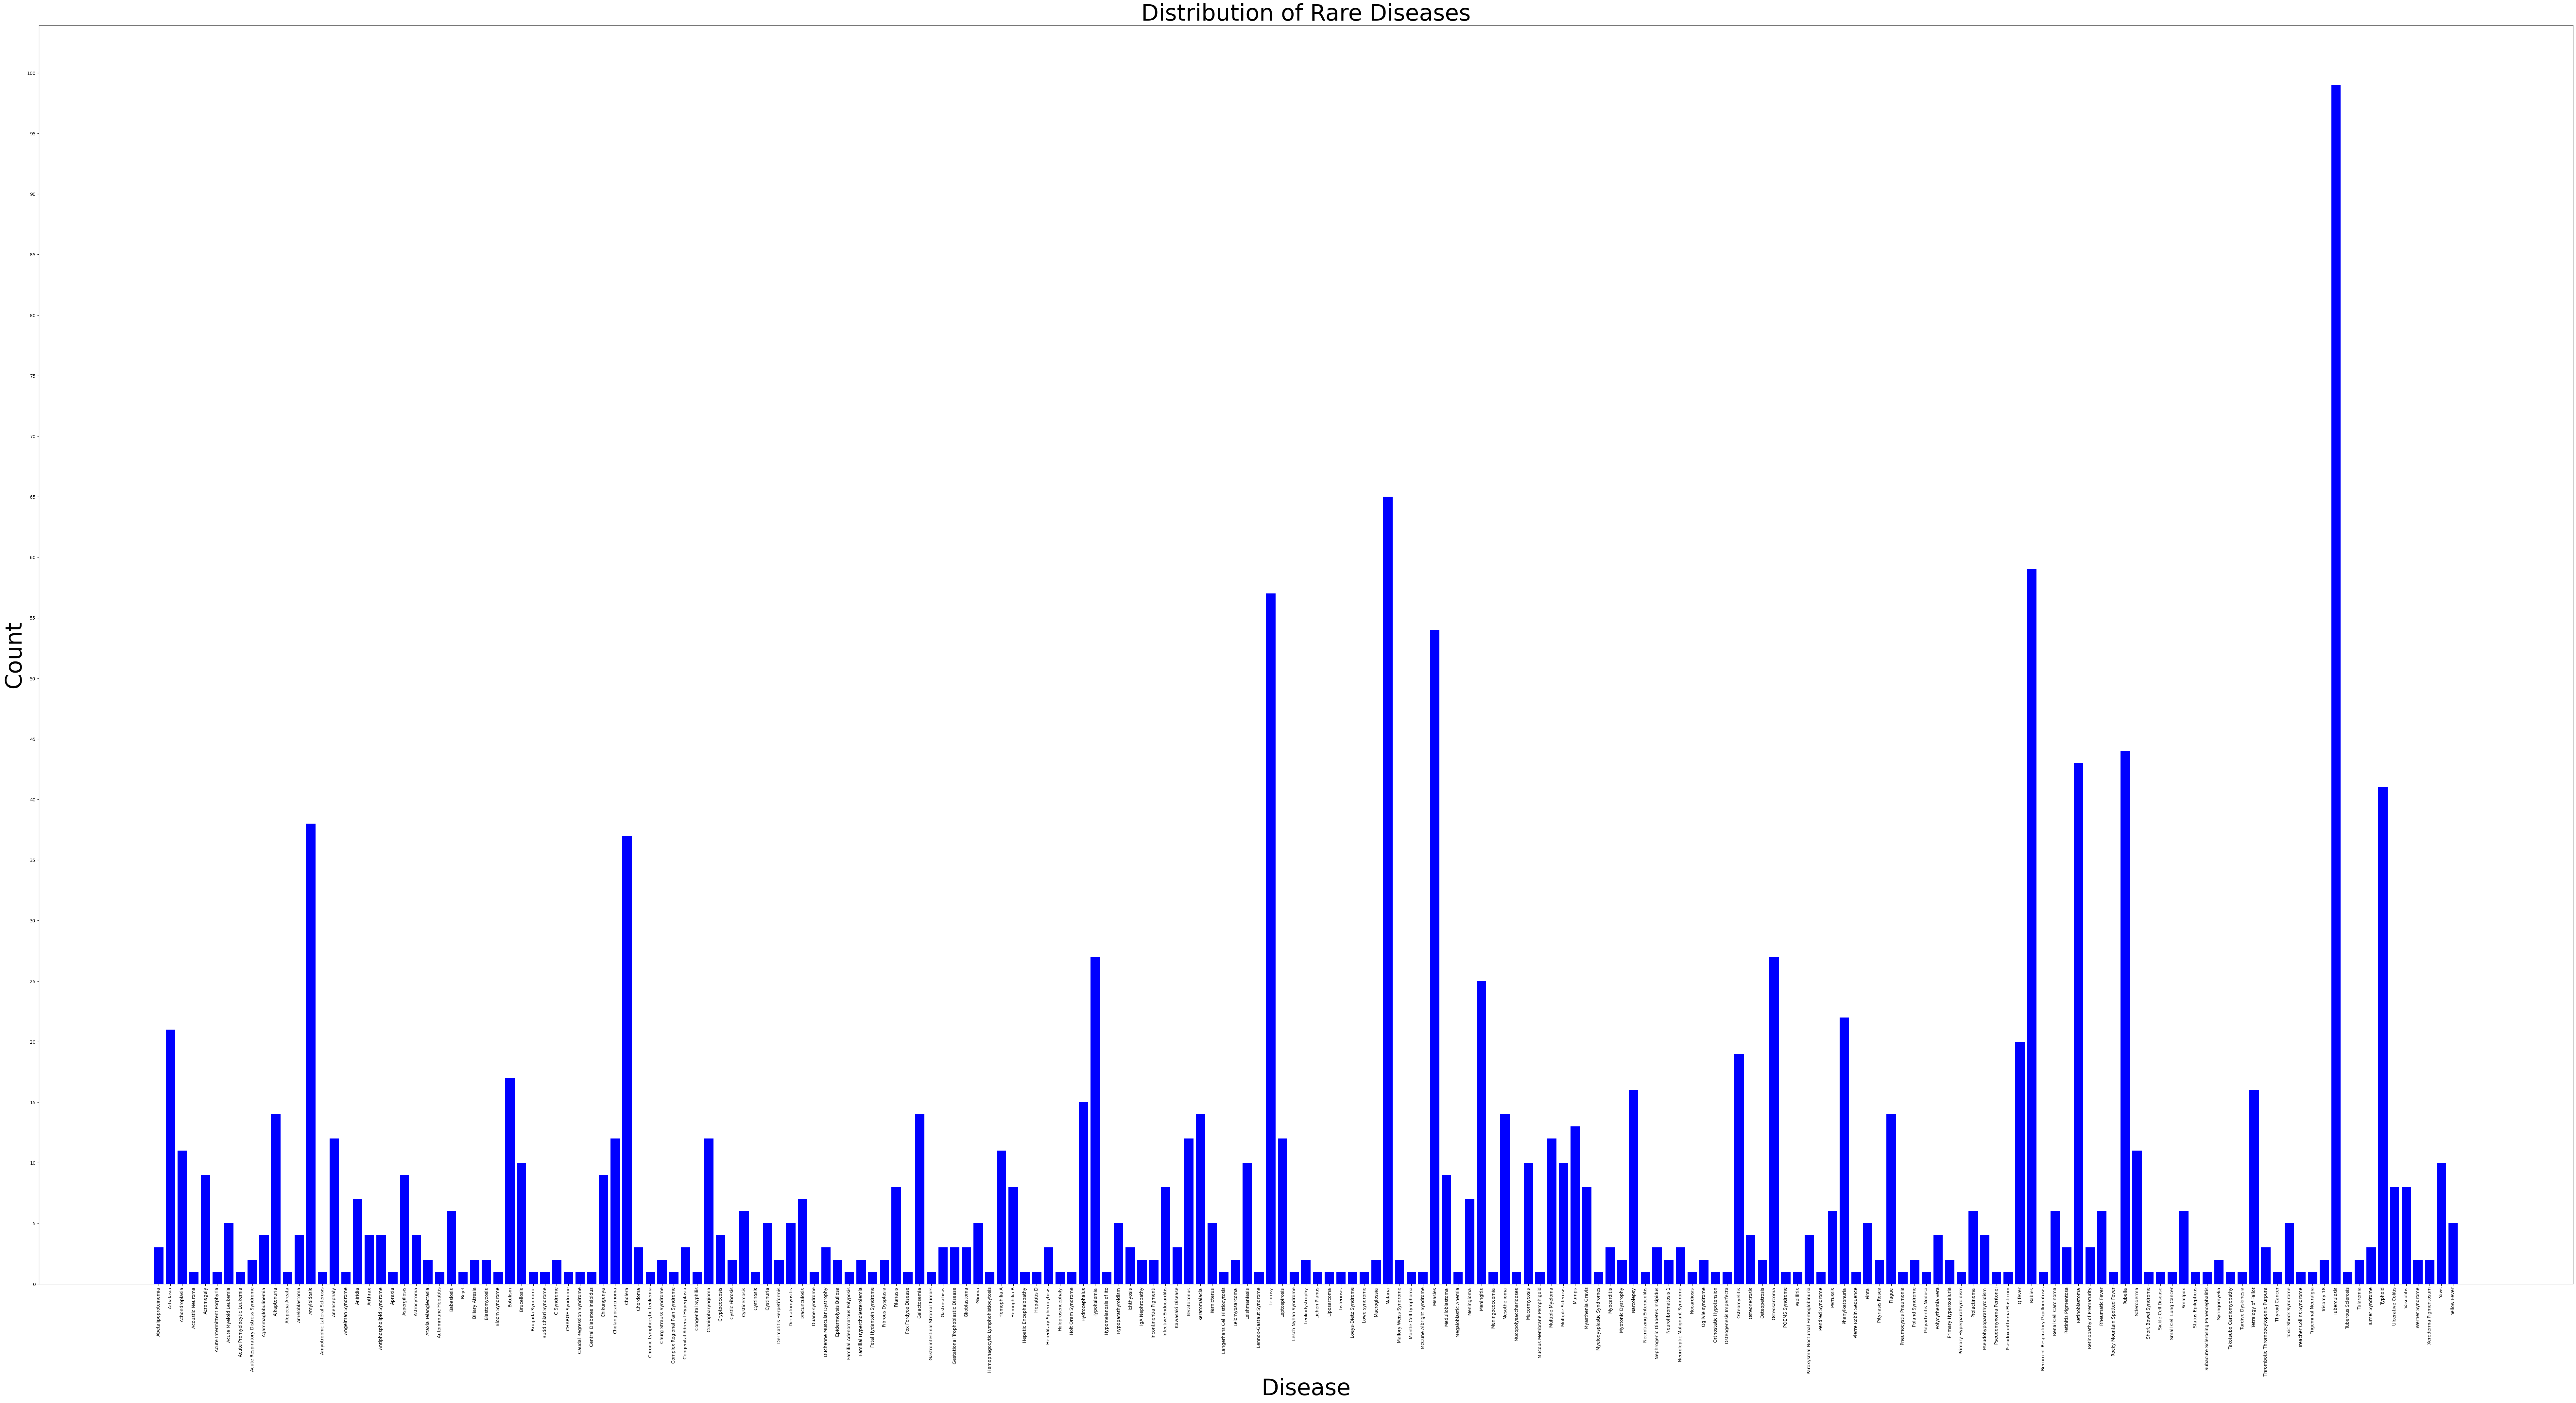

In [ ]:
#data distribution

redis_counts = {}

for example in redis_data:
    for i in example["rare disease"]:
      if i in redis_counts:
        redis_counts[i] += 1
      else:
        redis_counts[i] = 1

redis_counts = {key: val for key, val in sorted(redis_counts.items(), key = lambda ele: ele[0])}

codes = list(redis_counts.keys())
frequencies = list(redis_counts.values())

plt.figure(figsize=(100, 50))
plt.bar(codes, frequencies, color="blue")

plt.xlabel("Disease", fontsize=50)
plt.ylabel("Count", fontsize=50)
plt.title("Distribution of Rare Diseases", fontsize=50)

plt.xticks(rotation=90, fontsize=10)
max_y = max(frequencies) + 1
plt.yticks(np.arange(0, max_y + 1, 5))

plt.show()